In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Dataset/heart.csv") #loading the dataset
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Normalization
df["age"]=df["age"]/df["age"].max()
df["chol"]=df["chol"]/df["chol"].max()
df["thalach"]=df["thalach"]/df["thalach"].max()
df["trestbps"]=df["trestbps"]/df["trestbps"].max()
df["cp"]=df["cp"]/df["cp"].max()
df["fbs"]=df["fbs"]/df["fbs"].max()
df["oldpeak"]=df["oldpeak"]/df["oldpeak"].max()
df["slope"]=df["slope"]/df["slope"].max()
df["ca"]=df["ca"]/df["ca"].max()
df["thal"]=df["thal"]/df["thal"].max()
df["exang"]=df["exang"]/df["exang"].max()
df["restecg"]=df["restecg"]/df["restecg"].max()

In [4]:
df.head() 
#after normalization the data looks like this

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.818182,1,1.000000,0.725,0.413121,1.0,0.0,0.742574,0.0,0.370968,0.0,0.0,0.333333,1
1,0.480519,1,0.666667,0.650,0.443262,0.0,0.5,0.925743,0.0,0.564516,0.0,0.0,0.666667,1
2,0.532468,0,0.333333,0.650,0.361702,0.0,0.0,0.851485,0.0,0.225806,1.0,0.0,0.666667,1
3,0.727273,1,0.333333,0.600,0.418440,0.0,0.5,0.881188,0.0,0.129032,1.0,0.0,0.666667,1
4,0.740260,0,0.000000,0.600,0.627660,0.0,0.5,0.806931,1.0,0.096774,1.0,0.0,0.666667,1


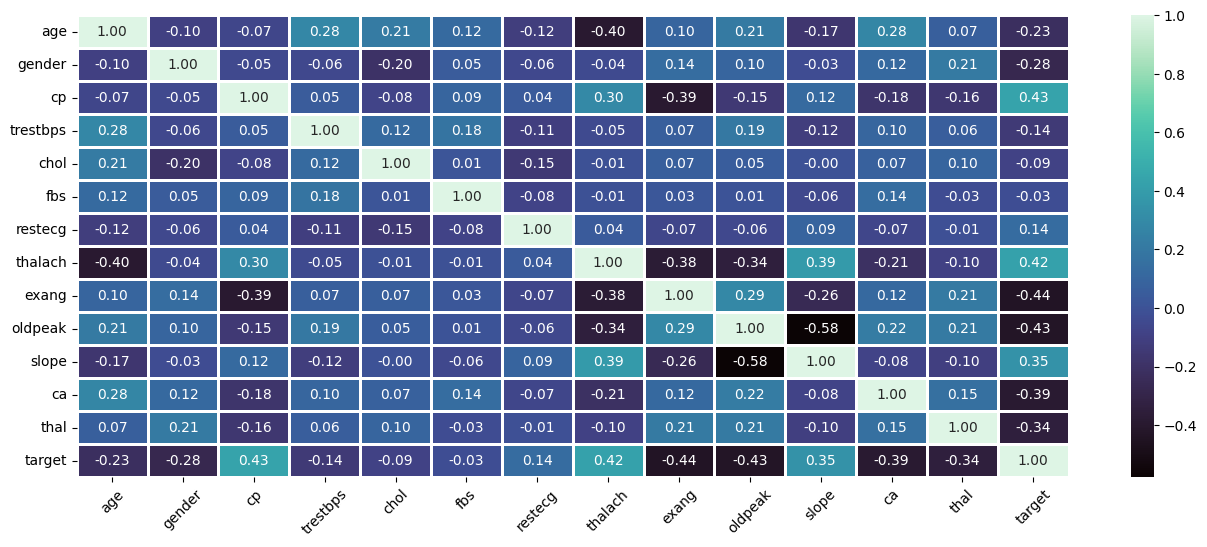

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2, cmap='mako')
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45); # correlations between the features
# positive value means high correlation

In [6]:
x = df[['age', 'gender','cp','trestbps','fbs','chol','restecg','thalach','exang','oldpeak','slope','ca','thal']].values # selecting the features for x
y = df['target'].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=5)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


### SVC

In [8]:
from sklearn import svm 
clf = svm.SVC(kernel = 'poly', degree = 3) #svm model with polynomial kernel of degree 3
#training over the dataset
clf.fit(x_train, y_train) 

SVC(kernel='poly')

In [9]:
from sklearn.metrics import accuracy_score
print("Train set Accuracy: ", accuracy_score(y_train, clf.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, clf.predict(x_test)))
y_pred1 = accuracy_score(y_test, clf.predict(x_test))

Train set Accuracy:  0.9090909090909091
Test set Accuracy:  0.8524590163934426


### KNeighbors Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#training over the dataset
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

In [11]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, neigh.predict(x_test)))
y_pred2 = metrics.accuracy_score(y_test, neigh.predict(x_test))

Train set Accuracy:  0.8388429752066116
Test set Accuracy:  0.8360655737704918


### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log = LogisticRegression(solver='lbfgs', max_iter=10000)
log.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [14]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, log.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, log.predict(x_test)))
y_pred3 = metrics.accuracy_score(y_test, log.predict(x_test))

Train set Accuracy:  0.8264462809917356
Test set Accuracy:  0.9016393442622951


### Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb = GaussianNB()

In [17]:
nb.fit(x_train,y_train)

GaussianNB()

In [18]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, nb.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, nb.predict(x_test)))
y_pred4 = metrics.accuracy_score(y_test, nb.predict(x_test))

Train set Accuracy:  0.8223140495867769
Test set Accuracy:  0.8688524590163934


### Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt = DecisionTreeClassifier()

In [21]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, dt.predict(x_test)))
y_pred5 = metrics.accuracy_score(y_test, dt.predict(x_test))

Test set Accuracy:  0.8360655737704918


### 13. Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier()

In [25]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, rf.predict(x_test)))
y_pred6 = metrics.accuracy_score(y_test, rf.predict(x_test))

Test set Accuracy:  0.9180327868852459


In [34]:
final_data = pd.DataFrame({'Models':['SVM','KNN','LR','NB','RF'],
                          'ACC':[accuracy_score(y_test,clf.predict(x_test))*100,
                                accuracy_score(y_test,neigh.predict(x_test))*100,
                                accuracy_score(y_test,log.predict(x_test))*100,
                                accuracy_score(y_test,nb.predict(x_test))*100,
                                accuracy_score(y_test,rf.predict(x_test))*100,]})

In [35]:
final_data

,Models,ACC
0,SVM,85.245902
1,KNN,83.606557
2,LR,90.163934
3,NB,86.885246
4,RF,91.803279


In [36]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

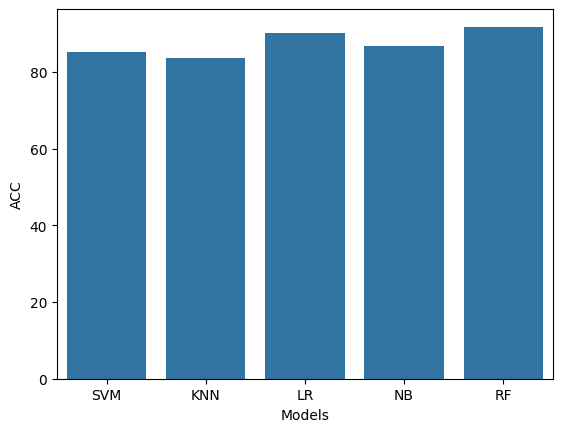

In [37]:
sns.barplot(x='Models',y='ACC',data=final_data)

### 15. Prediction on New Data

In [38]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [39]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [41]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


c:\Users\bedan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### 16. Save Model Using Joblib

In [42]:
import joblib

In [47]:
joblib.dump(rf,'model_joblib_heart.pkl')

['model_joblib_heart.pkl']

In [44]:
model = joblib.load('model_joblib_heart')

In [45]:
model.predict(new_data)

c:\Users\bedan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0], dtype=int64)

In [46]:
df.tail()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,0.740260,0,0.000000,0.70,0.427305,0.0,0.5,0.608911,1.0,0.032258,0.5,0.00,1.000000,0
299,0.584416,1,1.000000,0.55,0.468085,0.0,0.5,0.653465,0.0,0.193548,0.5,0.00,1.000000,0
300,0.883117,1,0.000000,0.72,0.342199,1.0,0.5,0.698020,0.0,0.548387,0.5,0.50,1.000000,0
301,0.740260,1,0.000000,0.65,0.232270,0.0,0.5,0.569307,1.0,0.193548,0.5,0.25,1.000000,0
302,0.740260,0,0.333333,0.65,0.418440,0.0,0.0,0.861386,0.0,0.000000,0.5,0.25,0.666667,0
